# Importing required libraries
Dataset:https://www.kaggle.com/datasets/datascientistanna/customers-dataset

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import os

In [35]:
file_path = 'Customers.csv.'
if os.path.exists(file_path):
    data = pd.read_csv(file_path)
    # Perform data cleaning and analysis here
else:
    print(f"Error: file '{file_path}' does not exist.")

# Load the dataset

In [36]:
data = pd.read_csv('Customers.csv')

In [37]:
data

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [38]:
if os.path.exists(file_path):
    data = pd.read_csv(file_path)
    # Perform data cleaning and analysis here
else:
    print(f"Error: file '{file_path}' does not exist.")

# Explore the dataset

In [39]:
print(data.head())

   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6  


In [40]:
print(data.describe())


        CustomerID          Age  Annual Income ($)  Spending Score (1-100)  \
count  2000.000000  2000.000000        2000.000000             2000.000000   
mean   1000.500000    48.960000      110731.821500               50.962500   
std     577.494589    28.429747       45739.536688               27.934661   
min       1.000000     0.000000           0.000000                0.000000   
25%     500.750000    25.000000       74572.000000               28.000000   
50%    1000.500000    48.000000      110045.000000               50.000000   
75%    1500.250000    73.000000      149092.750000               75.000000   
max    2000.000000    99.000000      189974.000000              100.000000   

       Work Experience  Family Size  
count      2000.000000  2000.000000  
mean          4.102500     3.768500  
std           3.922204     1.970749  
min           0.000000     1.000000  
25%           1.000000     2.000000  
50%           3.000000     4.000000  
75%           7.000000     5.00

In [41]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB
None


In [42]:
data.drop('CustomerID', axis='columns')

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3
2,Female,20,86000,6,Engineer,1,1
3,Female,23,59000,77,Lawyer,0,2
4,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...
1995,Female,71,184387,40,Artist,8,7
1996,Female,91,73158,32,Doctor,7,7
1997,Male,87,90961,14,Healthcare,9,2
1998,Male,77,182109,4,Executive,7,2


# Data Cleaning

In [43]:
# Data Cleaning
# Check for missing values
print(data.isnull().sum())

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64


In [44]:
# Drop missing values
data.dropna(inplace=True)

In [45]:
# Check for duplicates
print(data.duplicated().sum())

0


In [46]:
# Drop duplicates
data.drop_duplicates(inplace=True)

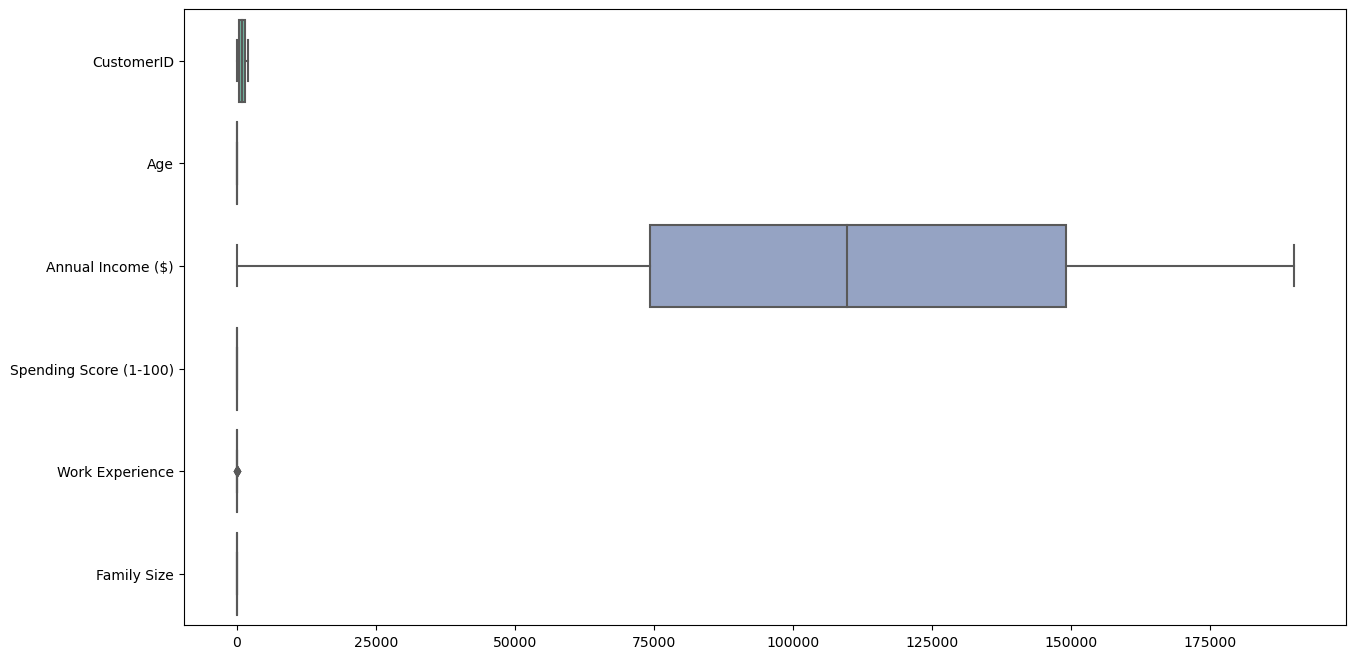

In [47]:
# Check for outliers using boxplots
plt.figure(figsize=(15,8))
sns.boxplot(data=data, orient='h', palette='Set2')
plt.show()


# Check the cleaned data

In [48]:
print(data.head())

   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6  


In [49]:
print(data.describe())

        CustomerID          Age  Annual Income ($)  Spending Score (1-100)  \
count  1965.000000  1965.000000        1965.000000             1965.000000   
mean   1000.309924    48.894656      110616.009669               51.078880   
std     578.443714    28.414889       45833.860195               27.977176   
min       1.000000     0.000000           0.000000                0.000000   
25%     498.000000    25.000000       74350.000000               28.000000   
50%    1000.000000    48.000000      109759.000000               50.000000   
75%    1502.000000    73.000000      149095.000000               75.000000   
max    2000.000000    99.000000      189974.000000              100.000000   

       Work Experience  Family Size  
count      1965.000000  1965.000000  
mean          4.092621     3.757252  
std           3.926459     1.968335  
min           0.000000     1.000000  
25%           1.000000     2.000000  
50%           3.000000     4.000000  
75%           7.000000     5.00

In [50]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              1965 non-null   int64 
 1   Gender                  1965 non-null   object
 2   Age                     1965 non-null   int64 
 3   Annual Income ($)       1965 non-null   int64 
 4   Spending Score (1-100)  1965 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         1965 non-null   int64 
 7   Family Size             1965 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 138.2+ KB
None


# Data Visualization

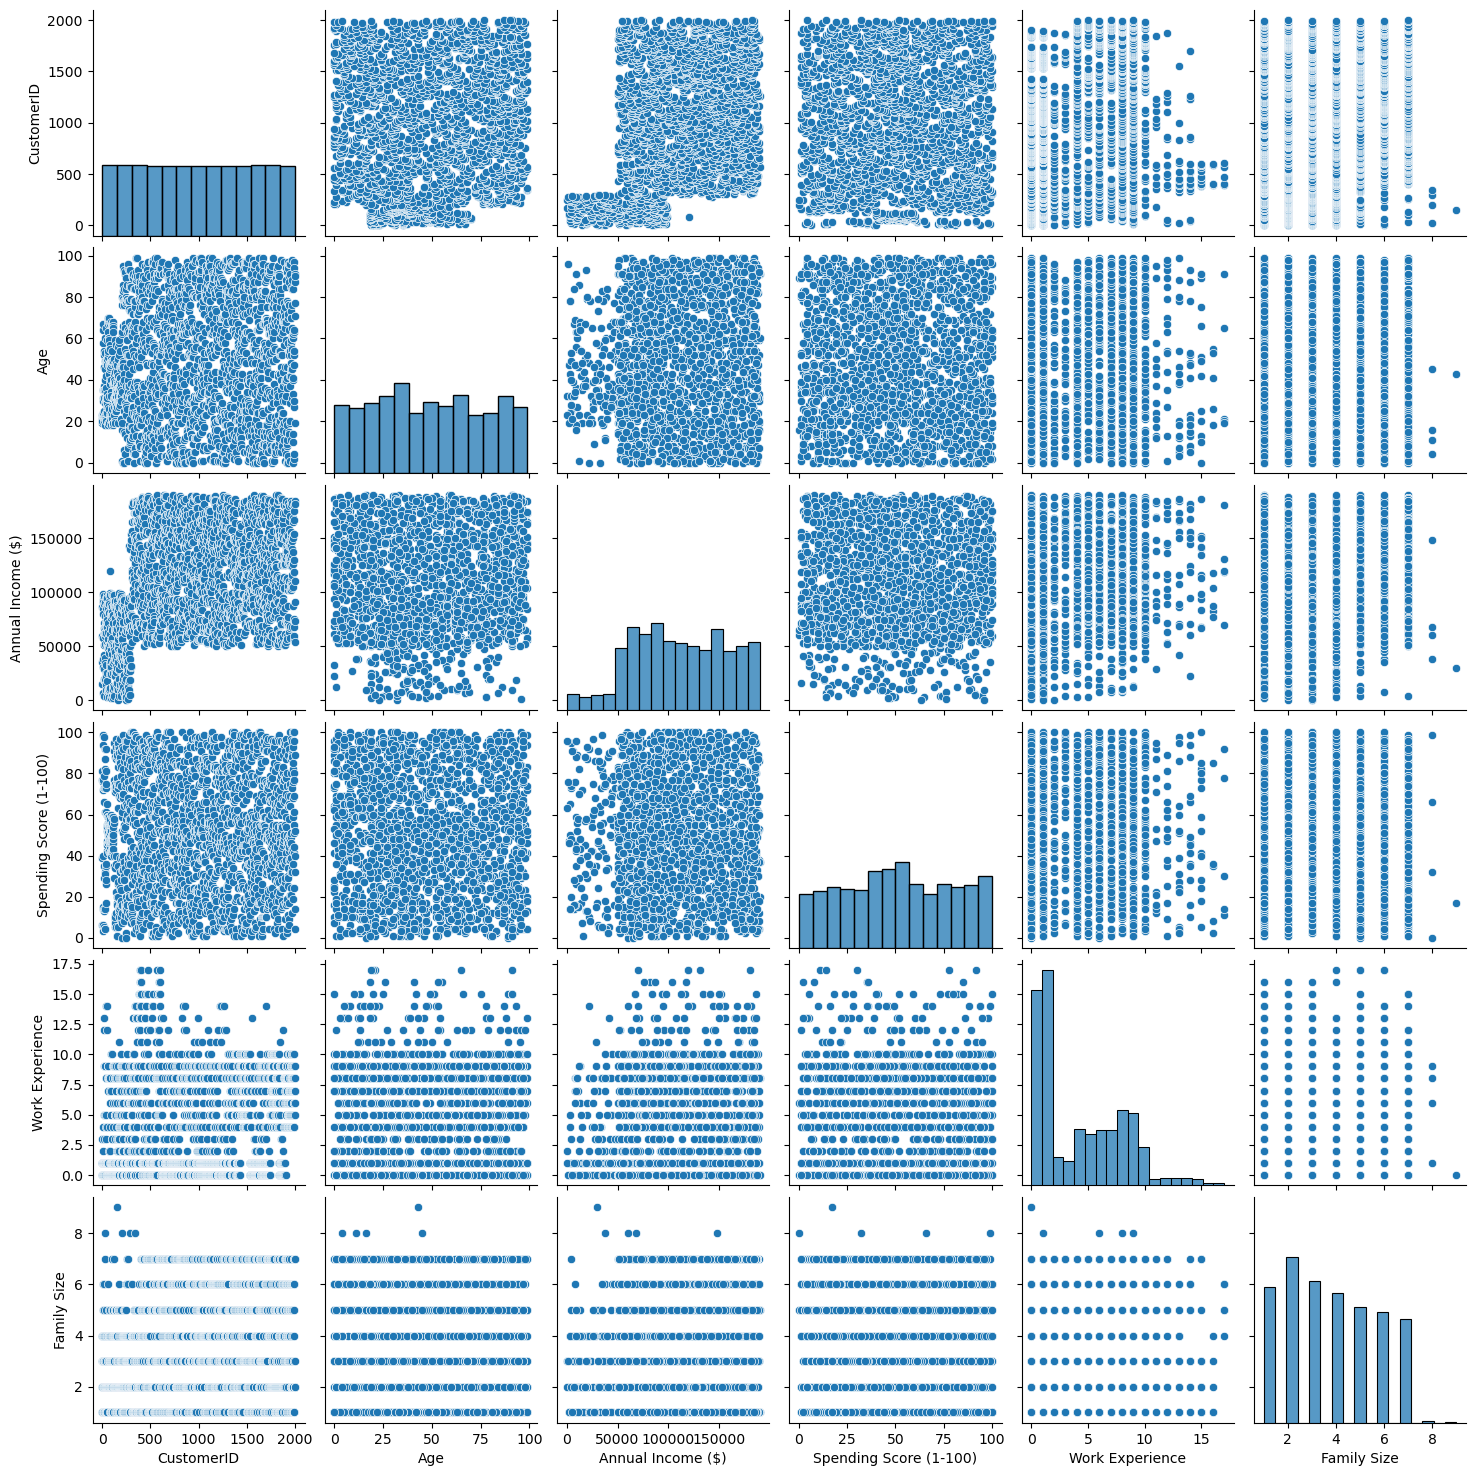

In [61]:
sns.pairplot(data)   # Plot pairwise relationships between variables
plt.show()

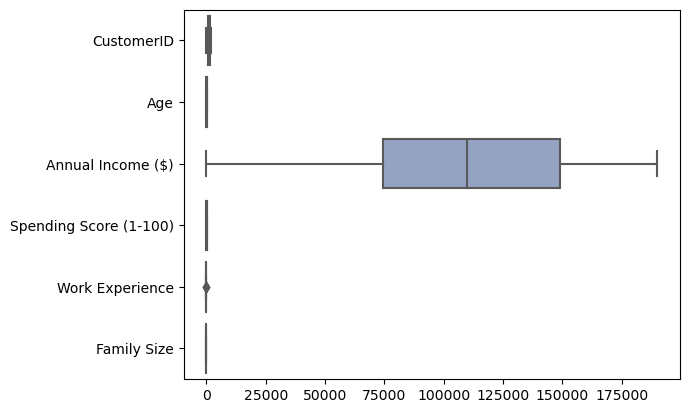

In [52]:
sns.boxplot(data=data, orient='h', palette='Set2')   # Boxplot for each variable
plt.show()

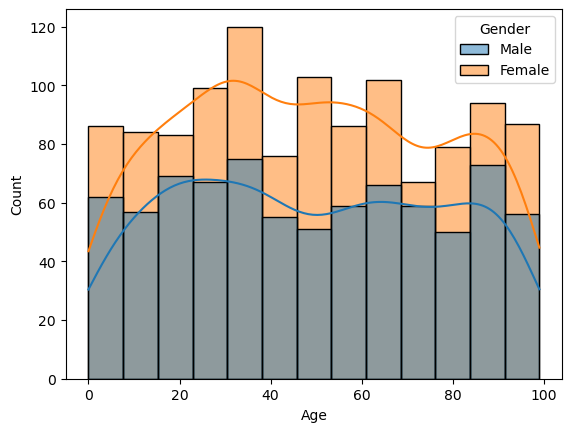

In [63]:
sns.histplot(data=data, x='Age', hue='Gender', kde=True)   # Histogram of Age by Gender
plt.show()

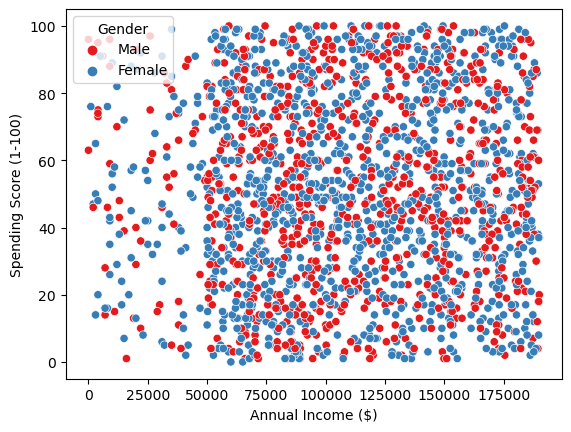

In [65]:
sns.scatterplot(data=data, x='Annual Income ($)', y='Spending Score (1-100)', hue='Gender', palette='Set1')   # Scatter plot of Annual Income vs. Spending Score by Gender
plt.show()

# Label Encoding

In [66]:
le = LabelEncoder()
data['Profession'] = le.fit_transform(data['Profession'])
data['Gender'] = le.fit_transform(data['Gender'])

# One-Hot Encoding

In [69]:
ohe = OneHotEncoder()
ohe_data = pd.DataFrame(ohe.fit_transform(data[['Profession']]).toarray())
data = pd.concat([data, ohe_data], axis='columns')
data.drop('Profession', axis='columns')

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,0,1,2,3,4,5,6,7,8
0,1.0,1.0,19.0,15000.0,39.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2.0,1.0,21.0,35000.0,81.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,20.0,86000.0,6.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,23.0,59000.0,77.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5.0,0.0,31.0,38000.0,40.0,2.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
data.dropna(inplace=True)

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,0,1,2,3,...,Gender_1.0,Profession_0.0,Profession_1.0,Profession_2.0,Profession_3.0,Profession_4.0,Profession_5.0,Profession_6.0,Profession_7.0,Profession_8.0
0,1.0,19.0,15000.0,39.0,1.0,4.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
1,2.0,21.0,35000.0,81.0,3.0,3.0,0.0,0.0,1.0,0.0,...,1,0,0,1,0,0,0,0,0,0
2,3.0,20.0,86000.0,6.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,4.0,23.0,59000.0,77.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,5.0,31.0,38000.0,40.0,2.0,6.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,1961.0,70.0,108544.0,49.0,4.0,5.0,1.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1961,1962.0,52.0,106530.0,46.0,7.0,2.0,0.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1962,1963.0,70.0,124359.0,51.0,7.0,7.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1,0,0
1963,1964.0,88.0,146970.0,90.0,7.0,6.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0


# Replace

In [73]:
data['Family Size'] = data['Family Size'].replace({'Single': 1, 'Small': 2, 'Medium': 3, 'Large': 4})

In [75]:
data.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,0,1,2,3,4,5,6,7,8
0,1.0,1.0,19.0,15000.0,39.0,5.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2.0,1.0,21.0,35000.0,81.0,2.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,20.0,86000.0,6.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,23.0,59000.0,77.0,7.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5.0,0.0,31.0,38000.0,40.0,3.0,2.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Train-Test Split

In [88]:
X = data.drop('Spending Score (1-100)', axis='columns')
y = data['Spending Score (1-100)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Linear Regression

In [89]:
lr = LinearRegression()
lr.fit(X_train, y_train)

C:\Users\Zihad Laptop\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

In [90]:
y_pred = lr.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))
print('R2 Score: ', r2_score(y_test, y_pred))

MSE:  761.8234409883313
R2 Score:  -0.026927270041156914


C:\Users\Zihad Laptop\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


# Visualize Output

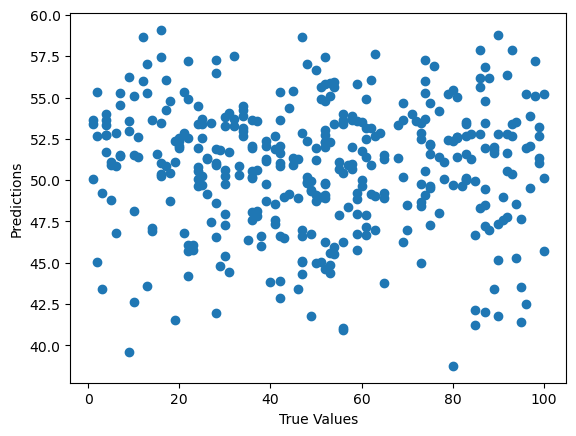

In [95]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()